To - Do Exercise:

For the provided dataset:

• diabetes.csv

Complete the following Problems.


Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


#1
df = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI. /diabetes_.csv')

print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

print("\nSummary statistics:")
display(df.describe(include='all'))


#2
df_clean = df.copy()

for col in df_clean.columns:
    if df_clean[col].isna().any():
        median_val = df_clean[col].median() if np.issubdtype(df_clean[col].dtype, np.number) else df_clean[col].mode().iloc[0]
        df_clean[col] = df_clean[col].fillna(median_val)

print("Any remaining NaNs?", df_clean.isna().any().any())

#3
if 'Outcome' in df_clean.columns:
    target_col = 'Outcome'
else:
    target_col = df_clean.columns[-1]
    print(f"Target column not explicitly labeled 'Outcome'. Using last column as target: {target_col}")

X = df_clean.drop(columns=[target_col]).values
y = df_clean[target_col].values

n = X.shape[0]
indices = np.random.permutation(n)
split_idx = int(0.7 * n)

train_idx, test_idx = indices[:split_idx], indices[split_idx:]
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


#4
def euclidean_distance(a: np.ndarray, b: np.ndarray) -> float:
    """
    Compute Euclidean distance between two 1D arrays.
    """
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_one(x_query: np.ndarray, X_train: np.ndarray, y_train: np.ndarray, k: int = 5) -> int:
    """
    Predict class for a single query point using KNN (majority vote).
    - Distance: Euclidean
    - Tie-breaker: smallest class label among the tied majority
    """
    dists = np.sqrt(np.sum((X_train - x_query) ** 2, axis=1))
    nn_idx = np.argpartition(dists, k)[:k]
    nn_labels = y_train[nn_idx]
    values, counts = np.unique(nn_labels, return_counts=True)
    return values[np.argmax(counts)]

def knn_predict(X_query: np.ndarray, X_train: np.ndarray, y_train: np.ndarray, k: int = 5) -> np.ndarray:
    """
    Predict classes for all query samples.
    """
    preds = np.zeros(X_query.shape[0], dtype=y_train.dtype)
    for i in range(X_query.shape[0]):
        preds[i] = knn_predict_one(X_query[i], X_train, y_train, k)
    return preds

def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return (y_true == y_pred).mean()


k_baseline = 5
t0 = time.time()
y_pred_baseline = knn_predict(X_test, X_train, y_train, k=k_baseline)
t1 = time.time()

acc_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline (unscaled) KNN | k={k_baseline}: Accuracy={acc_baseline:.4f}, Time={t1 - t0:.4f}s")

Shape: (768, 9)

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Summary statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Any remaining NaNs? False
Train size: 537 Test size: 231
Baseline (unscaled) KNN | k=5: Accuracy=0.6970, Time=0.0223s


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [5]:
#1
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_std[X_std == 0] = 1.0

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

k_scaled = 5
t0 = time.time()
y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k_scaled)
t1 = time.time()

acc_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Scaled KNN | k={k_scaled}: Accuracy={acc_scaled:.4f}, Time={t1 - t0:.4f}s")

#2
print("Comparison at k=5")
print(f"- Unscaled accuracy: {acc_baseline:.4f}")
print(f"- Scaled accuracy:   {acc_scaled:.4f}")
print("Observation: Scaling changes feature magnitudes, which can impact neighbor selection and thus accuracy.")

Scaled KNN | k=5: Accuracy=0.7273, Time=0.0248s
Comparison at k=5
- Unscaled accuracy: 0.6970
- Scaled accuracy:   0.7273
Observation: Scaling changes feature magnitudes, which can impact neighbor selection and thus accuracy.


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

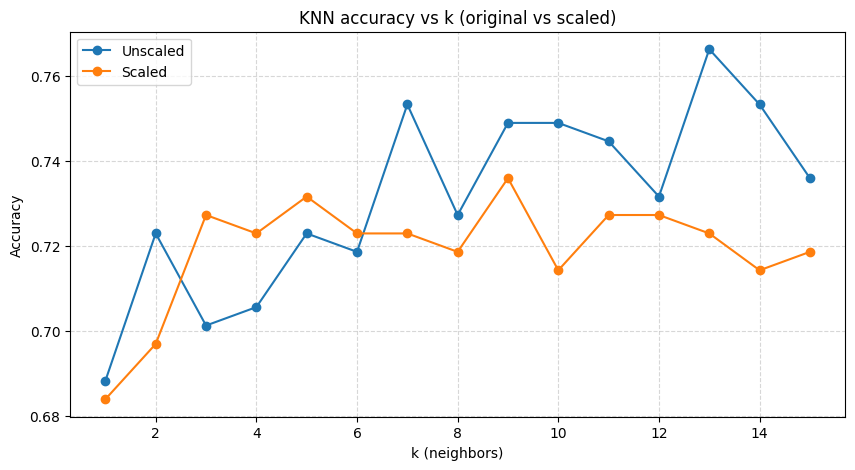

Best k (unscaled): 13 with accuracy 0.7662
Best k (scaled):   9 with accuracy 0.7359


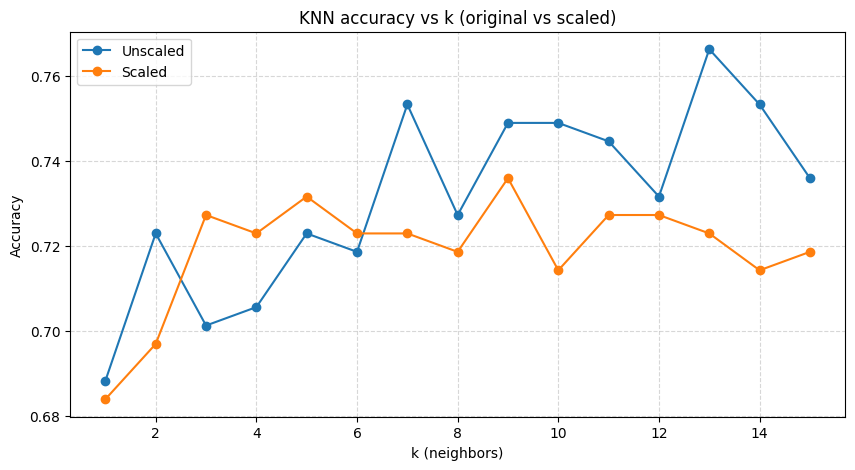

Best k (unscaled): 13 with accuracy 0.7662
Best k (scaled):   9 with accuracy 0.7359


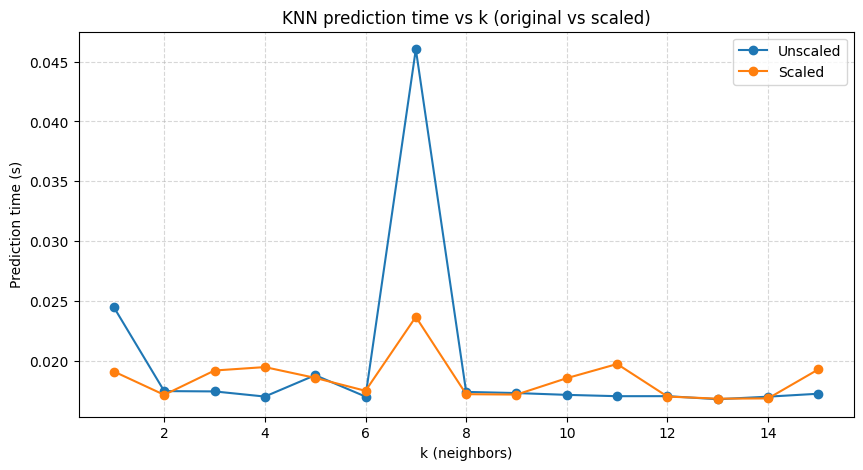

In [ ]:
#1
ks = list(range(1, 16))
acc_unscaled_list, time_unscaled_list = [], []
acc_scaled_list, time_scaled_list = [], []

for k in ks:
    t0 = time.time()
    y_pred_u = knn_predict(X_test, X_train, y_train, k=k)
    t1 = time.time()
    acc_unscaled_list.append(accuracy_score(y_test, y_pred_u))
    time_unscaled_list.append(t1 - t0)

    t0 = time.time()
    y_pred_s = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)
    t1 = time.time()
    acc_scaled_list.append(accuracy_score(y_test, y_pred_s))
    time_scaled_list.append(t1 - t0)

best_k_unscaled = ks[int(np.argmax(acc_unscaled_list))]
best_k_scaled = ks[int(np.argmax(acc_scaled_list))]


#2
plt.figure(figsize=(10, 5))
plt.plot(ks, acc_unscaled_list, marker='o', label='Unscaled')
plt.plot(ks, acc_scaled_list, marker='o', label='Scaled')
plt.xlabel('k (neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN accuracy vs k (original vs scaled)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

print(f"Best k (unscaled): {best_k_unscaled} with accuracy {max(acc_unscaled_list):.4f}")
print(f"Best k (scaled):   {best_k_scaled} with accuracy {max(acc_scaled_list):.4f}")


#3
plt.figure(figsize=(10, 5))
plt.plot(ks, time_unscaled_list, marker='o', label='Unscaled')
plt.plot(ks, time_scaled_list, marker='o', label='Scaled')
plt.xlabel('k (neighbors)')
plt.ylabel('Prediction time (s)')
plt.title('KNN prediction time vs k (original vs scaled)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()